## 为什么使用测试数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

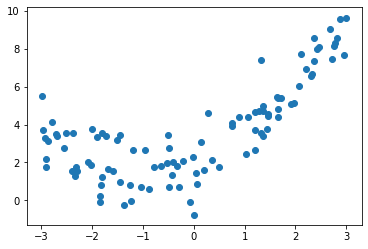

In [3]:
plt.scatter(x, y)
plt.show()

### 过拟合

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
from sklearn.metrics import mean_squared_error

poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict) # 均方差用于衡量模型准确度

0.6879768981520811

In [6]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot) # 均方差虽然小了，但是模型的预测效果太差了，如下图

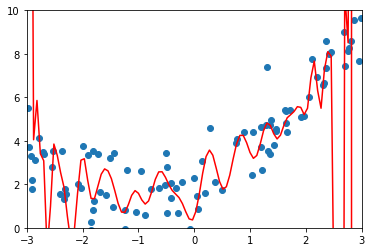

In [7]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### 过拟合模型的泛化能力差，是指由此及彼的能力差，即过拟合模型对新的数据的预测效果差。为了找到合适的degree，所以引入了测试集
+ 在训练集上表现好，同时在测试集上表现也好的模型，才是好模型
+ 在训练集上表现好，但是在测试集上表现很差的模型，就是泛化能力差的模型

### train test split的意义：确保训练出来的模型泛化能力强

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666) # 区分训练集测试集

In [11]:
'''欠拟合'''
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test) #
mean_squared_error(y_test, y_predict) # 均方差太大

2.2199965269396573

In [12]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

In [13]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150788

In [14]:
'''过拟合，导致在测试集上预测效果极差，这就体现出了测试集的作用'''
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

11695751727.09301

![模型的复杂度对训练集和测试集的影响](images/模型的复杂度对训练集和测试集的影响.png)